<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Main-Task" data-toc-modified-id="Main-Task-1">Main Task</a></span></li><li><span><a href="#1.-Import-libraries-and-setting-up-environment" data-toc-modified-id="1.-Import-libraries-and-setting-up-environment-2">1. Import libraries and setting up environment</a></span></li><li><span><a href="#2.-Import-Dataset" data-toc-modified-id="2.-Import-Dataset-3">2. Import Dataset</a></span></li><li><span><a href="#3.-Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="3.-Exploratory-Data-Analysis-(EDA)-4">3. Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.2.2.-Data-Distribution" data-toc-modified-id="3.2.2.-Data-Distribution-4.0.1">3.2.2. Data Distribution</a></span></li><li><span><a href="#Histogram" data-toc-modified-id="Histogram-4.0.2">Histogram</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.0.3">Conclusion</a></span></li></ul></li><li><span><a href="#3.3.-Data-Preparation" data-toc-modified-id="3.3.-Data-Preparation-4.1">3.3. Data Preparation</a></span></li></ul></li><li><span><a href="#4.-Models" data-toc-modified-id="4.-Models-5">4. Models</a></span><ul class="toc-item"><li><span><a href="#4.1-Convolutional-neural-network" data-toc-modified-id="4.1-Convolutional-neural-network-5.1">4.1 Convolutional neural network</a></span><ul class="toc-item"><li><span><a href="#4.1.1-Baseline-model" data-toc-modified-id="4.1.1-Baseline-model-5.1.1">4.1.1 Baseline model</a></span></li><li><span><a href="#4.1.2-Hyperparameter-tuning" data-toc-modified-id="4.1.2-Hyperparameter-tuning-5.1.2">4.1.2 Hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#I.-Layers-tuning" data-toc-modified-id="I.-Layers-tuning-5.1.2.1">I. Layers tuning</a></span><ul class="toc-item"><li><span><a href="#ii.-32-64-128-Dense:512" data-toc-modified-id="ii.-32-64-128-Dense:512-5.1.2.1.1">ii. 32-64-128 Dense:512</a></span></li><li><span><a href="#iii.-32-64-128-Dense:512-With-Batch-Normalization" data-toc-modified-id="iii.-32-64-128-Dense:512-With-Batch-Normalization-5.1.2.1.2">iii. 32-64-128 Dense:512 With Batch Normalization</a></span></li><li><span><a href="#iv.-With-Batch-Normalization-and-Drop-out" data-toc-modified-id="iv.-With-Batch-Normalization-and-Drop-out-5.1.2.1.3">iv. With Batch Normalization and Drop out</a></span></li><li><span><a href="#v.-Layer-weight-initializers-and-regularizers" data-toc-modified-id="v.-Layer-weight-initializers-and-regularizers-5.1.2.1.4">v. Layer weight initializers and regularizers</a></span></li><li><span><a href="#vi.-Stack" data-toc-modified-id="vi.-Stack-5.1.2.1.5">vi. Stack</a></span></li><li><span><a href="#VGG16-architect" data-toc-modified-id="VGG16-architect-5.1.2.1.6">VGG16 architect</a></span></li></ul></li></ul></li><li><span><a href="#4.1.3-Final-model" data-toc-modified-id="4.1.3-Final-model-5.1.3">4.1.3 Final model</a></span></li></ul></li><li><span><a href="#Fine-Tune" data-toc-modified-id="Fine-Tune-5.2">Fine Tune</a></span></li></ul></li><li><span><a href="#Function-to-create-model,-required-for-KerasClassifier" data-toc-modified-id="Function-to-create-model,-required-for-KerasClassifier-6">Function to create model, required for KerasClassifier</a></span></li><li><span><a href="#fix-random-seed-for-reproducibility" data-toc-modified-id="fix-random-seed-for-reproducibility-7">fix random seed for reproducibility</a></span></li><li><span><a href="#define-the-grid-search-parameters" data-toc-modified-id="define-the-grid-search-parameters-8">define the grid search parameters</a></span></li><li><span><a href="#summarize-results" data-toc-modified-id="summarize-results-9">summarize results</a></span></li><li><span><a href="#summarize-history-for-accuracy" data-toc-modified-id="summarize-history-for-accuracy-10">summarize history for accuracy</a></span></li><li><span><a href="#summarize-history-for-loss" data-toc-modified-id="summarize-history-for-loss-11">summarize history for loss</a></span></li></ul></div>

<hr style="border:0.1px solid gray">

<hr style="border:0.1px solid gray">

# Main Task

- **Task 1**: Classify images according to whether given cell image represents a cancerous cells or not (isCancerous)


- **Task 2**: Classify images according to cell-type, such as: fibroblast, inflammatory, epithelial or others.


- **Extra task**:

# 1. Import libraries and setting up environment

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import seaborn as sns
import cv2
import os
import tensorflow as tf

from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2

from math import floor
from sklearn.metrics import make_scorer, accuracy_score, classification_report

from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold,GridSearchCV

from PIL import Image
import warnings
warnings.filterwarnings('ignore')

LeakyReLU = LeakyReLU(alpha=0.1)

In [2]:
#It is important to check the version of these libraries to make sure that implement the latest method.
print('Tensorflow version:', tf.__version__)
print('CV2 version:', cv2.__version__)

Tensorflow version: 2.6.0
CV2 version: 4.5.5


# 2. Import Dataset

In [3]:
# Import data_labels_mainData.csv into a DataFrame
main_data = pd.read_csv('data_labels_mainData.csv')

# Import data_labels_extraData.csv into a DataFrame
extra_data = pd.read_csv('data_labels_extraData.csv')

# 3. Exploratory Data Analysis (EDA)

### 3.2.2. Data Distribution

### Histogram

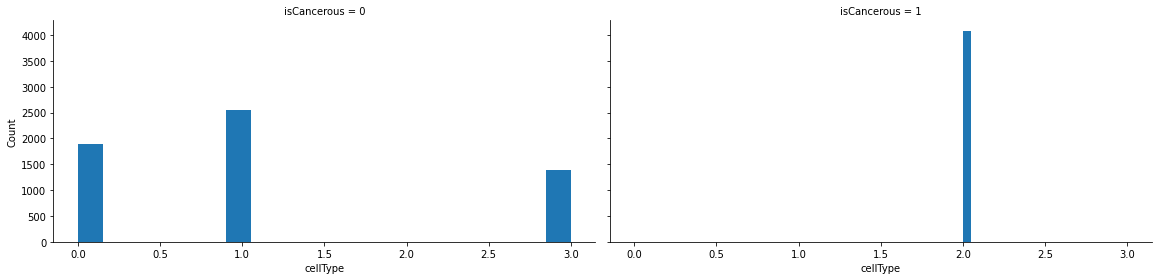

In [14]:
# Draw the histogram for cellType respected to isCancerous (class 0 and 1)
g = sns.FacetGrid(main_data, col='isCancerous', height=4, aspect=2)
g.map(plt.hist, str('cellType'), bins=20)
g.set_axis_labels('cellType', "Count")

**Analysis**

Looking at these two histograms, we can see that 'cellType' 0, 1, and 3 are not cancerous. Meanwhile only 'cellType' 2 is cancerous.

### Conclusion

- In **main_data**, only the attribute **cellType** continue to be our strongest candidate for to influence our model when it has high impact on our target attribute is **isCancerous**.


- Attributes such as **InstanceID** and **patientID** might create a lot of noise in our model. 


- There are 4 types of cells: 0, 1, 2, 3. Only cell type number 2 is cancerous while others are not cancerous.


- We expect the the model would predict class 0 more accurately than class 1

## 3.3. Data Preparation

In [4]:
#splitting data into train and validation 
train_task1, val_task1 = train_test_split(main_data[['ImageName', 'isCancerous']], 
                                              test_size=0.3, random_state=9,shuffle= True)


train_task2, val_task2 = train_test_split(main_data[['ImageName','cellType']], 
                                              test_size=0.3, random_state=9, stratify = main_data[['cellType']])                                        

print('Training data shape task 1:', train_task1.shape)
print('Validation data shape task 1:', val_task1.shape)

print('Training data shape task 2:', train_task2.shape)
print('Validation data shape task 2:', val_task2.shape)


Training data shape task 1: (6927, 2)
Validation data shape task 1: (2969, 2)
Training data shape task 2: (6927, 2)
Validation data shape task 2: (2969, 2)


In [5]:
#Create a a function to add image according to the name given from the list

def GetImage(directory):
    images=[]
    for name in tqdm(directory, desc="Adding images"):
        image = cv2.imread("patch_images/"+name)
        image = Image.fromarray(image,'RGB')
        images.append(np.array(image))
    result = np.array(images)
    print("\ngetImage COMPLETED!")
    return result



In [6]:
#Create a function to generate sample to fix the Imblance of the dataset
def GenerateSample(X,Y):
    ros = RandomOverSampler(random_state = 1)
    x, y = ros.fit_resample(X.values.reshape(-1,1), Y)
    x = x.flatten()
    return x,y

In [8]:
x2_train = train_task2['ImageName']
y2_train = train_task2['cellType']
print("Original Dataset:\n",y2_train.value_counts())

#Generate sample
x2_train, y2_train = GenerateSample(x2_train,y2_train)
print("Sampled Dataset:\n",y2_train.value_counts())
x2_train = GetImage(x2_train)

x2_val = val_task2['ImageName']
x2_val = GetImage(x2_val)

y2_val = val_task2['cellType']

x2_test,x2_val,y2_test,y2_val = train_test_split(x2_val, y2_val,
                                              test_size=0.5, random_state=9, stratify = y2_val)


Original Dataset:
 2    2855
1    1780
0    1322
3     970
Name: cellType, dtype: int64
Sampled Dataset:
 2    2855
3    2855
1    2855
0    2855
Name: cellType, dtype: int64


Adding images: 100%|███████████████████████████████████████████████████████████| 11420/11420 [00:01<00:00, 6128.21it/s]



getImage COMPLETED!


Adding images: 100%|█████████████████████████████████████████████████████████████| 2969/2969 [00:00<00:00, 5964.95it/s]


getImage COMPLETED!


In [9]:
print("TASK 2 SHAPE:")
print("x1 shape:", x2_train.shape)
print("y1 shape:", y2_train.shape)
print("VALIDATION SHAPE:")
print("x1 shape:", x2_val.shape)
print("y1 shape:", y2_val.shape)
print("TEST SHAPE:")
print("x1 shape:", x2_test.shape)
print("y1 shape:", y2_test.shape)

TASK 2 SHAPE:
x1 shape: (11420, 27, 27, 3)
y1 shape: (11420,)
VALIDATION SHAPE:
x1 shape: (1485, 27, 27, 3)
y1 shape: (1485,)
TEST SHAPE:
x1 shape: (1484, 27, 27, 3)
y1 shape: (1484,)


In [10]:
X2_train_scaled = x2_train / 255
X2_val_scaled = x2_val / 255
X2_test_scaled = x2_test / 255


In [11]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(27,27,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# 4. Models

## 4.1 Convolutional neural network

### 4.1.1 Baseline model

### 4.1.3 Final model

tf.config.experimental.list_physical_devices()

In [12]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(l=0.01),padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(l=0.01),padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(l=0.01),padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(l=0.01),padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])



In [13]:
layer_names = [layer.name for layer in model.layers]
layer_names

['sequential',
 'conv2d',
 'batch_normalization',
 'conv2d_1',
 'batch_normalization_1',
 'max_pooling2d',
 'dropout',
 'conv2d_2',
 'batch_normalization_2',
 'conv2d_3',
 'batch_normalization_3',
 'max_pooling2d_1',
 'dropout_1',
 'conv2d_4',
 'batch_normalization_4',
 'conv2d_5',
 'batch_normalization_5',
 'max_pooling2d_2',
 'dropout_2',
 'flatten',
 'dense',
 'batch_normalization_6',
 'dropout_3',
 'dense_1',
 'batch_normalization_7',
 'dropout_4',
 'dense_2']

In [14]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005, beta_1=0.4, beta_2=0.444, decay=1.0e-6, amsgrad=True)
model.compile(optimizer=opt , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=10, verbose=1, mode='auto'),
]

EPOCHS = 125
BATCH_SIZE = 32

import time
start_time = time.time()

with tf.device('/GPU:0'): 
    history = model.fit(X2_train_scaled, y2_train,
                    validation_data=(X2_val_scaled, y2_val), 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    verbose=1,
                    callbacks=my_callbacks)

print("---  Training time in seconds ---%s " % (time.time() - start_time))

Epoch 1/125
357/357 [==============================] - 9s 16ms/step - loss: 19.5236 - accuracy: 0.5371 - val_loss: 18.5255 - val_accuracy: 0.5468
Epoch 2/125
357/357 [==============================] - 5s 14ms/step - loss: 16.9331 - accuracy: 0.5923 - val_loss: 15.8025 - val_accuracy: 0.6613
Epoch 3/125
357/357 [==============================] - 5s 15ms/step - loss: 14.9772 - accuracy: 0.6125 - val_loss: 14.0152 - val_accuracy: 0.6869
Epoch 4/125
357/357 [==============================] - 5s 15ms/step - loss: 13.3819 - accuracy: 0.6342 - val_loss: 12.6544 - val_accuracy: 0.6667
Epoch 5/125
357/357 [==============================] - 6s 16ms/step - loss: 12.0209 - accuracy: 0.6499 - val_loss: 11.4575 - val_accuracy: 0.6734
Epoch 6/125
357/357 [==============================] - 5s 15ms/step - loss: 10.8568 - accuracy: 0.6610 - val_loss: 10.3020 - val_accuracy: 0.6936
Epoch 7/125
357/357 [==============================] - 5s 15ms/step - loss: 9.8590 - accuracy: 0.6697 - val_loss: 9.3672 - v

357/357 [==============================] - 5s 14ms/step - loss: 1.0682 - accuracy: 0.7877 - val_loss: 1.0067 - val_accuracy: 0.8135
Epoch 58/125
357/357 [==============================] - 5s 15ms/step - loss: 1.0510 - accuracy: 0.7882 - val_loss: 0.9956 - val_accuracy: 0.8162
Epoch 59/125
357/357 [==============================] - 5s 15ms/step - loss: 1.0317 - accuracy: 0.7861 - val_loss: 1.0130 - val_accuracy: 0.7926
Epoch 60/125
357/357 [==============================] - 5s 15ms/step - loss: 1.0230 - accuracy: 0.7875 - val_loss: 0.9643 - val_accuracy: 0.8088
Epoch 61/125
357/357 [==============================] - 5s 15ms/step - loss: 0.9988 - accuracy: 0.7884 - val_loss: 0.9863 - val_accuracy: 0.8067
Epoch 62/125
357/357 [==============================] - 5s 15ms/step - loss: 0.9856 - accuracy: 0.7887 - val_loss: 0.9998 - val_accuracy: 0.7919
Epoch 63/125
357/357 [==============================] - 5s 15ms/step - loss: 0.9777 - accuracy: 0.7935 - val_loss: 0.9933 - val_accuracy: 0.785

357/357 [==============================] - 5s 15ms/step - loss: 0.6825 - accuracy: 0.8241 - val_loss: 0.7291 - val_accuracy: 0.8141
Epoch 114/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6716 - accuracy: 0.8231 - val_loss: 0.7384 - val_accuracy: 0.8007
Epoch 115/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6662 - accuracy: 0.8307 - val_loss: 0.7408 - val_accuracy: 0.8007
Epoch 116/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6638 - accuracy: 0.8304 - val_loss: 0.7729 - val_accuracy: 0.7710
Epoch 117/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6664 - accuracy: 0.8310 - val_loss: 0.7476 - val_accuracy: 0.8101
Epoch 118/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6568 - accuracy: 0.8323 - val_loss: 0.7292 - val_accuracy: 0.8155
Epoch 119/125
357/357 [==============================] - 5s 15ms/step - loss: 0.6714 - accuracy: 0.8241 - val_loss: 0.7267 - val_accuracy:

(1, 27, 27, 32)
(1, 27, 27, 32)
(1, 27, 27, 32)
(1, 27, 27, 32)
(1, 13, 13, 32)
(1, 13, 13, 32)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 6, 6, 64)
(1, 6, 6, 128)
(1, 6, 6, 128)
(1, 6, 6, 128)
(1, 6, 6, 128)
(1, 3, 3, 128)
(1, 3, 3, 128)
(1, 1152)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 4)


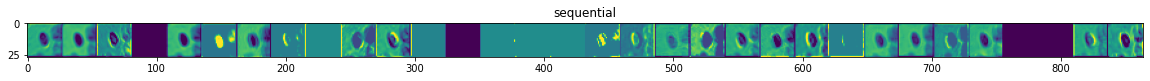

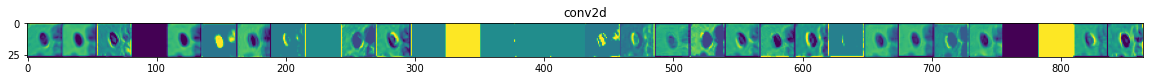

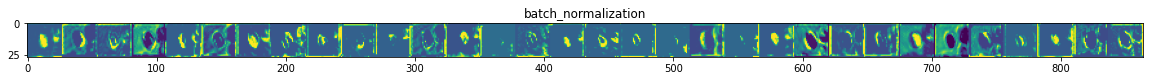

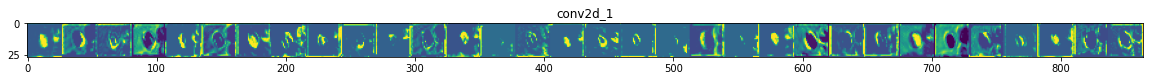

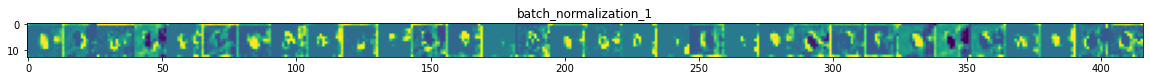

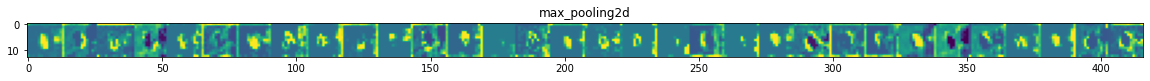

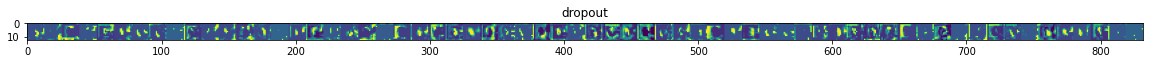

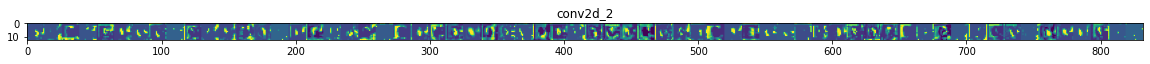

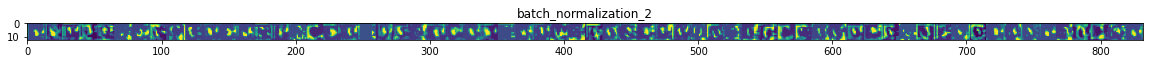

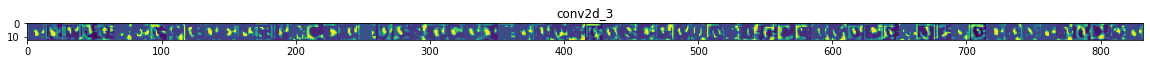

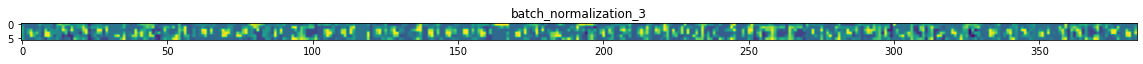

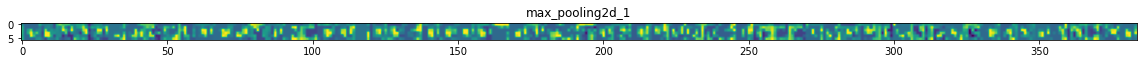

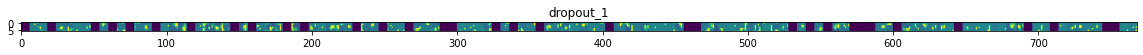

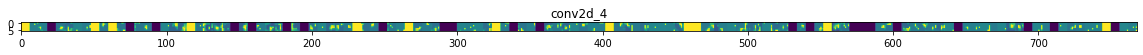

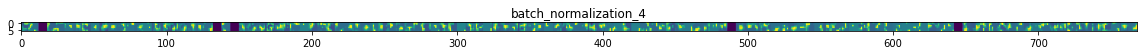

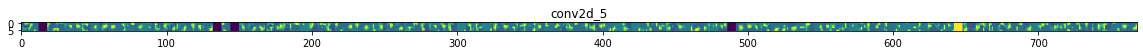

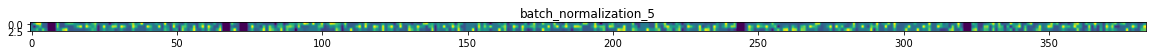

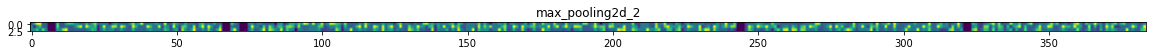

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img_path='patch_images2//task1//others//270.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(27, 27))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## Fine Tune

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential([
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(), 
        layers.MaxPooling2D(2,2), 
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.4),
        
        layers.Flatten(),
        layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(4, activation='softmax')
    ])
    # Compile model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X2_train_scaled,y2_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [29]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

 model.load_weights("task2_weights.111-0.76.h5")


scores = model.evaluate(X2_val_scaled, y2_val, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])
print('Max Validation accuracy:', max(history.history['accuracy']))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

from sklearn.metrics import classification_report
predict=model.predict(X2_test_scaled)
classes=np.argmax(predict,axis=1)

print(classification_report(y2_test, classes))


In [30]:
class_names = ["fibroblast","inflammatory","epithelial","others"]

import numpy as np
batch_predict = model.predict (X2_test_scaled)
plt.figure(figsize=(15, 15))

for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    first_image = X2_test_scaled[i]
    first_label = int(y2_test.iloc[i])
    plt.imshow(first_image)
    confidence = round(100 * (np.max(batch_predict[i][0])), 2)
    actual_class= class_names[first_label]
    predicted_class = class_names[np.argmax(batch_predict[i])]
    
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
    